In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Set random seed for reproducibility
np.random.seed(42)

Dataset columns: Index(['description', 'disease'], dtype='object')
Total samples: 374

Class distribution:
disease
UTI        134
Malaria    125
Typhoid    115
Name: count, dtype: int64


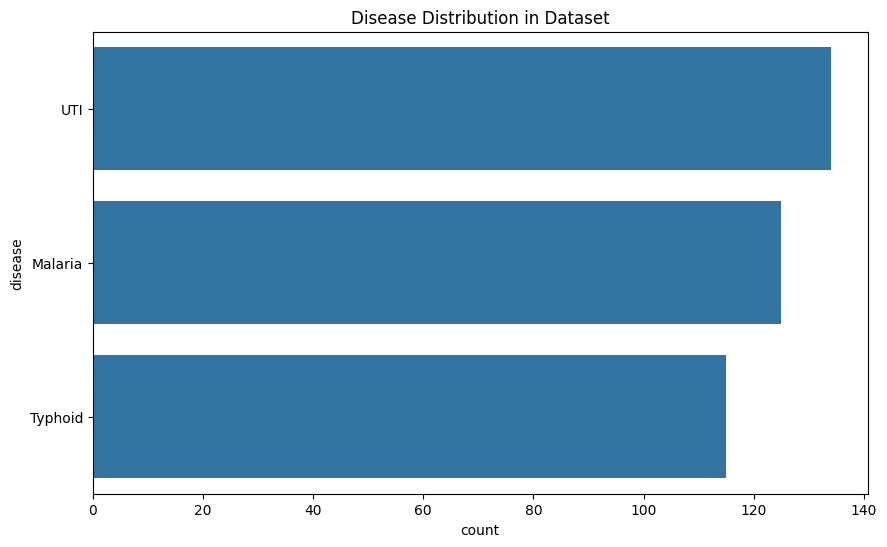

In [2]:
# Load your dataset
df = pd.read_csv('diseases.csv')  # Assuming columns are 'descriptions' and 'disease'

# Verify column names
print("Dataset columns:", df.columns)
print("Total samples:", len(df))
print("\nClass distribution:")
print(df['disease'].value_counts())

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='disease', order=df['disease'].value_counts().index)
plt.title('Disease Distribution in Dataset')
plt.show()

In [4]:
def advanced_swahili_preprocessor(text):
    """Advanced preprocessing with spelling pattern normalization"""
    text = text.lower().strip()
    
    # Remove special characters but keep Swahili specific characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Common Swahili character transpositions and errors
    transpositions = [
        (r'(.)\1+', r'\1\1'),  # Reduce character repetitions (e.g., 'naummmwa' -> 'naummwa')
        (r'(\b\w{2,})h\b', r'\1'),  # Remove trailing 'h' (common error)
        (r'\b([^aeiou])\1', r'\1'),  # Reduce consonant doubling
        (r'([aeiou])\1', r'\1'),  # Reduce vowel doubling
        (r'\b([kmtw])([aeiou])\1', r'\1\2'),  # Fix common syllable repetitions
        (r'([nm])([^aeiou])', lambda m: m.group(1) + 'i' + m.group(2)),  # Add missing 'i'
    ]
    
    for pattern, replacement in transpositions:
        text = re.sub(pattern, replacement, text)
    
    # Common Swahili word stems preservation
    stems = {
        r'\bnaum[^\w]*': 'naumwa ',
        r'\bkizungu[^\w]*': 'kizunguzungu ',
        r'\b(ki|vi)([^aeiou\s]{2})': r'\1\2 ',  # Preserve noun class prefixes
        r'\b(na|ni|u|a|tu|m|wa)([^aeiou\s]{2})': r'\1\2 ',  # Preserve subject prefixes
    }
    
    for pattern, replacement in stems.items():
        text = re.sub(pattern, replacement, text)
    
    return text.strip()

# Apply advanced preprocessing
df['processed_text'] = df['description'].apply(advanced_swahili_preprocessor)

# Show preprocessing examples
print("\nPreprocessing examples:")
sample = df.sample(5, random_state=42)
for orig, proc in zip(sample['description'], sample['processed_text']):
    print(f"Original: {orig[:50]}... -> Processed: {proc[:50]}...")


Preprocessing examples:
Original: Joto linaniua kabisa... -> Processed: joto linaniua kabisa...
Original: Mkojo unanuka vibaya... -> Processed: mikojo unanuka vibaya...
Original: Kutapika na kichefuchefu... -> Processed: kutapika na kich efuchefu...
Original: Homa ni kama inapanda juu sana... -> Processed: homa ni kama inapanida ju sana...
Original: Mkojo wa mawingu... -> Processed: mikojo wa mawinigu...
